In [6]:
#Pull Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [7]:
#Read in csv file
data = pd.read_csv("archive/Spotify_data_csv.csv")
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,9/25/28,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,5/15/20,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,6/8/20,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,5/29/20,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2/28/20,0.0385,129.916,0.4720,2020


In [13]:
#Truncate to 75 years
data_year = pd.read_csv("archive/Spotify_data_by_year.csv")
data_year

data_75 = data_year.loc[(data_year["year"] >= 1945) & (data_year["year"] <= 2020)]
data_75

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
25,1945,0.711386,0.517856,195720.266500,0.225413,0.274928,0.203334,-16.927997,0.301714,108.256917,0.491416,2.093000,0,1
26,1946,0.920627,0.415141,266923.718642,0.222361,0.486736,0.210503,-16.897529,0.088526,103.121426,0.400751,1.659954,7,1
27,1947,0.915655,0.472104,232131.882701,0.262955,0.351209,0.223445,-14.414844,0.100229,108.972883,0.509181,1.642180,0,1
28,1948,0.922949,0.462736,200208.082000,0.241484,0.361887,0.218799,-15.517199,0.160782,107.684211,0.462211,1.429500,0,1
29,1949,0.907088,0.444031,223351.576000,0.247214,0.298759,0.209581,-15.490747,0.103392,108.875563,0.434334,3.771000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.226944,0.581583,258001.186462,0.656547,0.203332,0.221417,-8.002876,0.097232,123.814929,0.432452,29.212431,7,1
97,2017,0.207413,0.580475,243402.249536,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.140015,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.326320,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1


The r-squared is: 0.32220198805247574


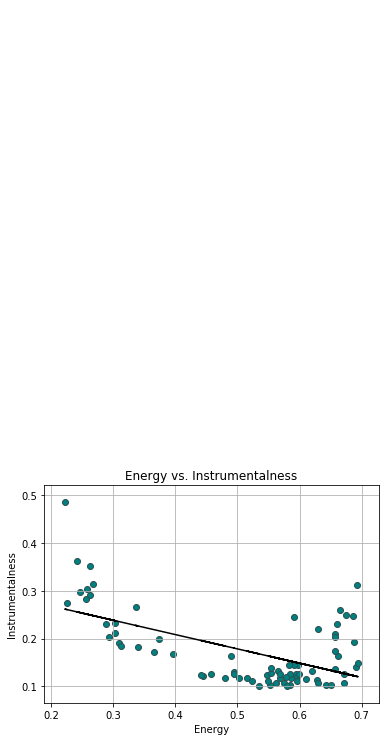

In [14]:
#Scatterplot of energy vs. instrumentalness
x_values = data_75["energy"]
y_values = data_75["instrumentalness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Instrumentalness")
plt.xlabel("Energy")
plt.ylabel("Instrumentalness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_instrumentalness.png")

#Display scatter plot
plt.show()

The r-squared is: 0.9106923327696513


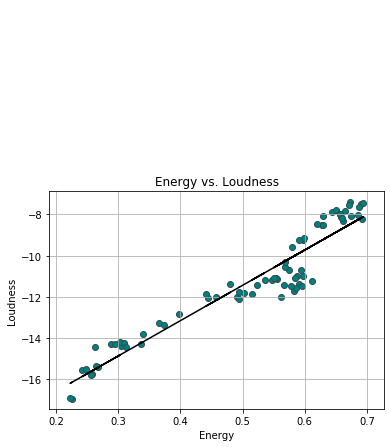

In [15]:
#Scatterplot of energy vs. loudness
x_values = data_75["energy"]
y_values = data_75["loudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_loudness.png")

#Display scatter plot
plt.show()

The r-squared is: 0.0008611166019605014


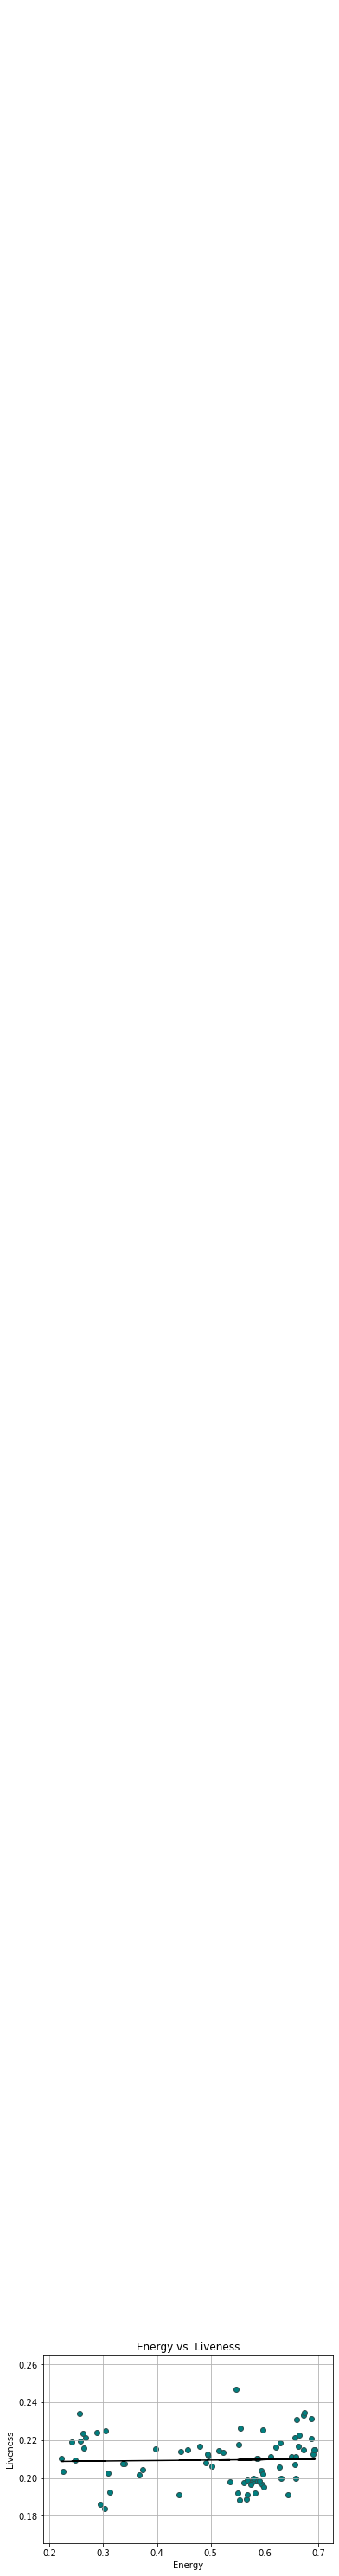

In [16]:
#Scatterplot of energy vs. liveness
x_values = data_75["energy"]
y_values = data_75["liveness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Liveness")
plt.xlabel("Energy")
plt.ylabel("Liveness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_liveness.png")

#Display scatter plot
plt.show()

The r-squared is: 0.9679221362448666


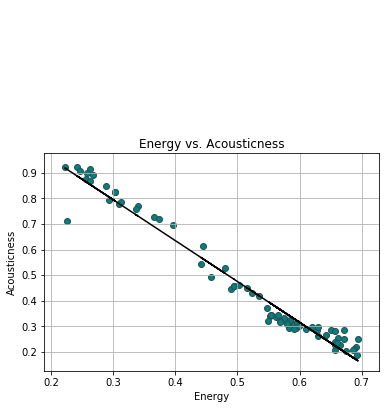

In [17]:
#Scatterplot of energy vs. acousticness
x_values = data_75["energy"]
y_values = data_75["acousticness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Acousticness")
plt.xlabel("Energy")
plt.ylabel("Acousticness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_acousticness.png")

#Display scatter plot
plt.show()

The r-squared is: 0.9082840588981671


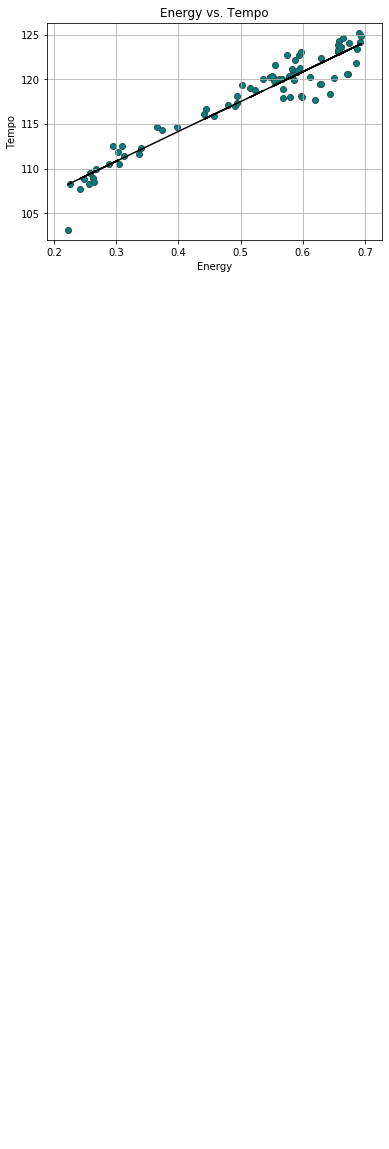

In [18]:
#Scatterplot of energy vs. tempo
x_values = data_75["energy"]
y_values = data_75["tempo"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Tempo")
plt.xlabel("Energy")
plt.ylabel("Tempo")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_tempo.png")

#Display scatter plot
plt.show()

The r-squared is: 0.06393471293946247


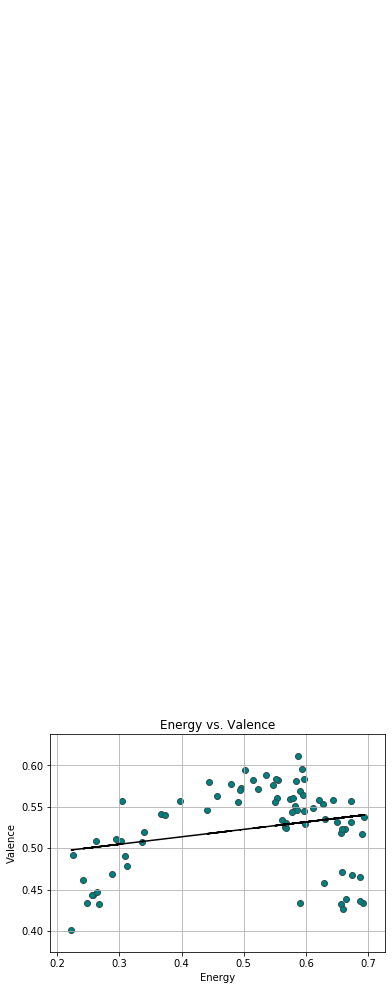

In [19]:
#Scatterplot of energy vs. valence
x_values = data_75["energy"]
y_values = data_75["valence"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Valence")
plt.xlabel("Energy")
plt.ylabel("Valence")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_valence.png")

#Display scatter plot
plt.show()